# Platform Statistics



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import display, Markdown
import matplotlib.pyplot as plt


# reset db connection
from django.db import connection
connection.close()

%timeit
media_qs = Media.objects.all()
artist_qs = Artist.objects.all()
release_qs = Release.objects.all()
label_qs = Label.objects.all()
playlist_qs = Playlist.objects.all()
user_qs = User.objects.all()
relation_qs = Relation.objects.all()


total_counts = {
    'media': media_qs.count(),
    'artist': artist_qs.count(),
    'release': release_qs.count(),
    'label': label_qs.count(),
    'playlist': playlist_qs.count(),
    'relation': relation_qs.count(),
    'user': user_qs.count(),
}


print('Total Counts')
display(total_counts)

#plt.plot([(v, k) for k, v in total_counts.iteritems()])


# filter items without image
# release_qs.filter(main_image='').count()



Total Counts


{'artist': 37114,
 'label': 7110,
 'media': 142211,
 'playlist': 907,
 'relation': 385026,
 'release': 19940,
 'user': 813}

In [23]:
release_qs_with_mb = release_qs.filter(relations__service='musicbrainz')
release_qs_without_mb = release_qs.exclude(pk__in=release_qs_with_mb)

release_qs_without_image = release_qs.filter(main_image='')

print('total:         {}'.format(release_qs.count()))
print('with mb:       {}'.format(release_qs_with_mb.count()))
print('without mb:    {}'.format(release_qs_without_mb.count()))
print('without image: {}'.format(release_qs_without_image.count()))



release_qs_with_mb_without_image = (release_qs_without_image & release_qs_with_mb)

print(release_qs_with_mb_without_image.count())

_x = release_qs_with_mb_without_image.first()
_x.relations.filter(service='musicbrainz')
#_x.get_absolute_url()



total:         19940
with mb:       13614
without mb:    6326
without image: 115
21


[<Relation: http://musicbrainz.org/release/df717881-2a34-4760-832d-619ca3313a62>]

In [24]:
# reset db connection
from django.db import connection
connection.close()


_x = relation_qs.exclude(service__in=['generic', 'official',]).order_by('service').values_list('service', flat=True).distinct()
print(_x)

[u'bandcamp', u'discogs', u'discogs_master', u'facebook', u'itunes', u'lastfm', u'linkedin', u'musicbrainz', u'soundcloud', u'twitter', u'wikipedia', u'youtube']


## summarized stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


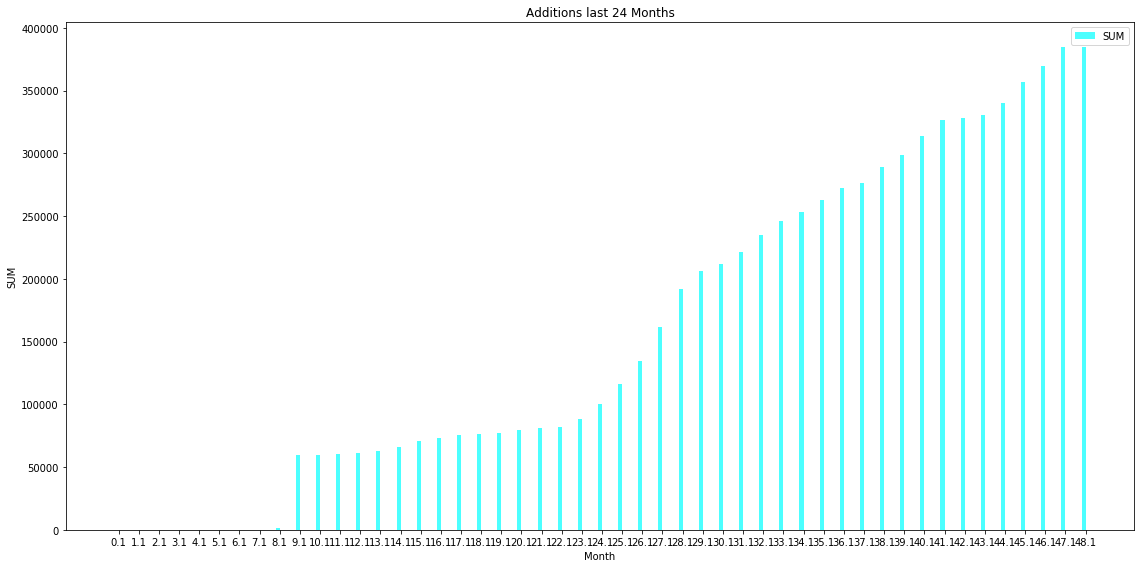

In [31]:
%load_ext autoreload
%autoreload 22
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import qsstats
import datetime

# reset db connection
from django.db import connection
connection.close()


today = datetime.date.today()
five_years_ago = today - datetime.timedelta(days=1460)

relation_qss = qsstats.QuerySetStats(relation_qs, 'created')
relation_ts = relation_qss.time_series(five_years_ago, today, interval='months')

#print([t[1] for t in relation_ts])


def sum_series(series):
    total = 0
    summed_series = []
    for i in series:
        total += i
        summed_series.append(total)
    return summed_series
    

summed_stats = sum_series([t[1] for t in relation_ts])


n_groups = len(summed_stats)

plt.rcParams['figure.figsize'] = (16,8)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, summed_stats, bar_width,
                alpha=opacity, color='#00FFFF',
                error_kw=error_config,
                label='SUM')

ax.set_title('Additions last 24 Months')
ax.set_xlabel('Month')
ax.set_ylabel('SUM')
ax.set_xticks(index + bar_width / 2)

ax.legend()
fig.tight_layout()

plt.show()

    


# Testing Plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


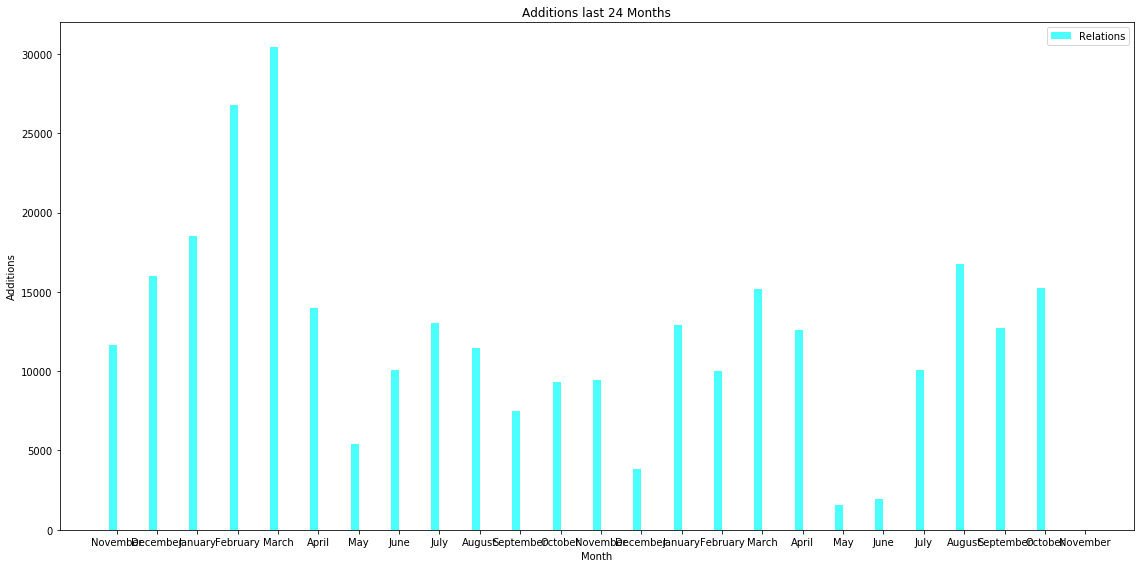

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import qsstats
import datetime

# reset db connection
from django.db import connection
connection.close()


today = datetime.date.today()
twelve_months_ago = today - datetime.timedelta(days=730)

relation_qss = qsstats.QuerySetStats(relation_qs, 'created')
relation_ts = relation_qss.time_series(twelve_months_ago, today, interval='months')


relation_stats = [t[1] for t in relation_ts]

n_groups = 25

plt.rcParams['figure.figsize'] = (16,8)

fig, ax = plt.subplots()

#fig.set_size_inches()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, relation_stats, bar_width,
                alpha=opacity, color='#00FFFF',
                error_kw=error_config,
                label='Relations')

ax.set_title('Additions last 24 Months')
ax.set_xlabel('Month')
ax.set_ylabel('Additions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([t[0].strftime("%B") for t in relation_ts])

ax.legend()
fig.tight_layout()

plt.show()





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[1435, 698, 1812, 1206, 1794, 1177, 1028, 645, 959, 505, 556, 688, 0]
[1111, 291, 883, 368, 354, 183, 186, 215, 1647, 2955, 1845, 3092, 0]


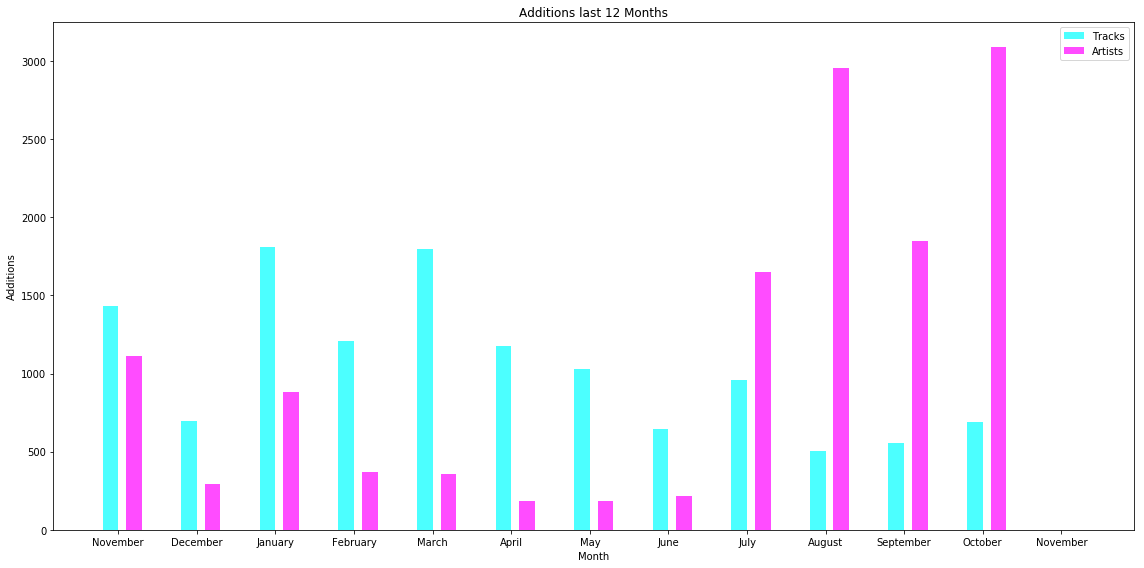

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import qsstats
import datetime

# reset db connection
from django.db import connection
connection.close()

today = datetime.date.today()
seven_days_ago = today - datetime.timedelta(days=365)



media_qss = qsstats.QuerySetStats(media_qs, 'created')
artist_qss = qsstats.QuerySetStats(artist_qs, 'created')

media_ts = media_qss.time_series(seven_days_ago, today, interval='months')
artist_ts = artist_qss.time_series(seven_days_ago, today, interval='months')

#print(time_series)


media_stats = [t[1] for t in media_ts]
artist_stats = [t[1] for t in artist_ts]

print(media_stats)
print(artist_stats)

n_groups = 13

plt.rcParams['figure.figsize'] = (16,8)

fig, ax = plt.subplots()

#fig.set_size_inches()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, media_stats, bar_width,
                alpha=opacity, color='#00FFFF',
                error_kw=error_config,
                label='Tracks')

rects2 = ax.bar(index + bar_width + 0.1, artist_stats, bar_width,
                alpha=opacity, color='#FF00FF',
                error_kw=error_config,
                label='Artists')



ax.set_title('Additions last 12 Months')
ax.set_xlabel('Month')
ax.set_ylabel('Additions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([t[0].strftime("%B") for t in media_ts])

ax.legend()
fig.tight_layout()

plt.show()




In [ ]:
!ls

In [ ]:
from IPython.display import display, Audio

m = Media.objects.last()
display(m.master.path)

Audio(filename=m.master.path)